In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns

In [2]:
## Lectura y carga de datos en memoria

refs = pd.read_csv(
    "../datasets/F00018833-Latinobarometro_Serie_de_Tiempo_2002_2024.csv", sep=";"
)
encs = []
for f in tqdm(os.listdir("../datasets")):
    if f.endswith(".sav"):
        _name = f.removesuffix(".sav")
        _name = _name.split("_")[0]
        _cols = refs[_name]
        _df = pd.read_spss(f"../datasets/{f}", usecols=_cols)
        _df = _df.loc[:, _cols]
        _df.columns = refs["Título"]
        encs.append(_df)

df = pd.concat(encs)
df.columns.name = None
cols_to_drop = [
    "¿Por cuál partido votaría si este domingo hubiera elecciones?",
    "Preocupación de quedar sin trabajo dentro de los próximo doce meses",
    "Bienes: Lavarropas",
    "Principal ingreso familiar",
    "Edad de finalización de estudios - Entrevistado",
    "Estado ocupacional último (pasivos)",
    "Estado ocupacional del jefe de familia",
    "Estado ocupacional último del jefe de familia (pasivos)",
    "Tipo de trabajo que realiza el jefe de familia",
    "Bienes: Auto",
    "Bienes: Alcantarillado/Cloacas ",
    "Religión",
    "Estado ocupacional",
    "Nivel de estudios alcanzado - Entrevistado",
    "Ciudad",
    "Bienes: Agua caliente"
]
df.drop(cols_to_drop, axis=1, inplace=True)
cols_final = [
    'apoya_democ',
    'satisfaccion_democ',
    'escala_izqder',
    'aprobacion_presidente',
    'percep_economia',
    'conf_congreso',
    'conf_gobierno',
    'conf_poderjud',
    'conf_iglesia',
    'conf_policia',
    'conf_ffaa',
    'conf_partidospol',
    'sexo',
    'edad',
    'nse',
    'pais',
    'anio',
    'ponderador'
]

df.columns = cols_final
df.reset_index(drop=True, inplace=True)
df.head()

100%|██████████| 21/21 [00:07<00:00,  2.75it/s]


,apoya_democ,satisfaccion_democ,escala_izqder,aprobacion_presidente,percep_economia,conf_congreso,conf_gobierno,conf_poderjud,conf_iglesia,conf_policia,conf_ffaa,conf_partidospol,sexo,edad,nse,pais,anio,ponderador
0,"En algunas circunstancias, un gobierno autorit...",No muy satisfecho,Izquierda,No aprueba,Mala,Algo,Algo,Algo,NaN,Algo,Algo,Poca,Mujer,61.0,Regular,Argentina,2017,1.583
1,La democracia es preferible a cualquier otra f...,No muy satisfecho,5,Aprueba,Regular,Ninguna,Ninguna,Ninguna,Poca,Ninguna,Ninguna,Poca,Hombre,39.0,Regular,Argentina,2017,0.71
2,La democracia es preferible a cualquier otra f...,Muy satisfecho,8,Aprueba,Regular,Poca,Algo,Algo,Algo,Algo,Algo,Poca,Mujer,38.0,Muy bueno,Argentina,2017,0.999
3,La democracia es preferible a cualquier otra f...,No muy satisfecho,NaN,Aprueba,Mala,Poca,Mucha,Ninguna,Mucha,Poca,Mucha,Ninguna,Mujer,48.0,Malo,Argentina,2017,0.71
4,La democracia es preferible a cualquier otra f...,Mas bien satisfecho,8,Aprueba,Buena,Poca,Mucha,Mucha,Mucha,Poca,Mucha,Ninguna,Hombre,67.0,Bueno,Argentina,2017,0.71


In [3]:
for y in df.anio.unique():
    print(y, df.query(f"anio == '{y}'")["apoya_democ"].value_counts(), "\n")

2017 apoya_democ
La democracia es preferible a cualquier otra forma de gobier    10785
A la gente como uno, nos da lo mismo un régimen democrático      5075
En algunas circunstancias, un gobierno autoritario puede ser     2526
Name: count, dtype: int64 

2003 apoya_democ
La democracia es preferible a cualquier otra forma de gobier    12176
A la gente como uno, nos da lo mismo un régimen democrático      4158
En algunas circunstancias, un gobierno autoritario puede ser     3286
Name: count, dtype: int64 

2009 apoya_democ
La democracia es preferible a cualquier otra forma de gobier    13961
A la gente como uno, nos da lo mismo un régimen democrático      3775
En algunas circunstancias, un gobierno autoritario puede ser     3381
Name: count, dtype: int64 

2002 apoya_democ
La democracia es preferible a cualquier otra forma de gobier    12687
A la gente como uno, nos da lo mismo un régimen democrático      3182
En algunas circunstancias, un gobierno autoritario puede ser     3057
Name: co

In [4]:
## Limpieza y unificación de variables
map_apoya_democ = {
    "La democracia es preferible a cualquier otra forma de gobier": 3,
    "En algunas circunstancias, un gobierno autoritario puede ser": 2,
    "A la gente como uno, nos da lo mismo un régimen democrático": 1,
    "Un gobierno autoritario puede ser preferible a uno democrati": 2,
    "Nos da lo mismo un regimen democratico que uno no democratic": 1,
    "Democracia es preferible": 3,
    "Gobierno autoritario": 2,
    "Da lo mismo": 1,
    "A nosotros nos da igual la democracia que la no democracia": 1,
    "La democracia es preferible a otra forma de gobierno": 3,
    "En ocasiones un gobierno autoritario es mejor que democracia": 2,
    "La democracia es preferible a cualquier otra forma de gobierno": 3,
    "En algunas circunstancias, un gobierno autoritario puede ser preferible a uno democratico": 2,
    "A la gente como uno, nos da lo mismo un regimen democratico que uno no democratico": 1,
    "La democracia es preferible a cualquier otra forma": 3,
    "A la gente como uno, nos da lo mismo un  regimen": 1,
    "En algunas circunstancias, un gobierno autoritario": 2,
    "A la gente como uno, nos da lo mismo un régimen democrá": 1,
    "La democracia es preferible a cualquier otra forma de gob.": 3,
    "En algunas circunstancias gob.autor. puede ser preferible": 2,
    "..Nos da lo mismo un régimen democrát.que uno no democrático": 1,
    "A la gente como uno, nos da lo mismo un régimen democrático que uno no democrático": 1,
    "En algunas circunstancias, un gobierno autoritario puede ser preferible": 2,
    "No sabe": np.nan,
    "No contesta": np.nan,
    "En algunas circunstancias, un gobierno autoritario puede ser preferible a uno democratico.": 2,
}

df["apoya_democ"] = df["apoya_democ"].map(map_apoya_democ)
df["apoya_democ"].value_counts()

apoya_democ
3.0    214374
1.0     77184
2.0     57408
Name: count, dtype: int64

In [5]:
for y in df.anio.unique():
    print(y, df.query(f"anio == '{y}'")["satisfaccion_democ"].value_counts(), "\n")

2017 satisfaccion_democ
No muy satisfecho      8204
Nada satisfecho        5008
Mas bien satisfecho    4374
Muy satisfecho         1751
Name: count, dtype: int64 

2003 satisfaccion_democ
No muy satisfecho      8987
Más bien satisfecho    5529
Nada satisfecho        4429
Muy satisfecho         1177
Name: count, dtype: int64 

2009 satisfaccion_democ
No muy satisfecho      8444
Más bien satisfecho    7442
Nada satisfecho        3000
Muy satisfecho         2845
Name: count, dtype: int64 

2002 satisfaccion_democ
No muy satisfecho       8073
Mas bien satisfecho     5920
Para nada satisfecho    3938
Muy satisfecho          1681
Name: count, dtype: int64 

2008 satisfaccion_democ
No muy satisfecho      9206
Más bien satisfecho    6825
Nada satisfecho        3634
Muy satisfecho         2042
Name: count, dtype: int64 

2011 satisfaccion_democ
No muy satisfecho      8592
Más bien satisfecho    6205
Nada satisfecho        2978
Muy satisfecho         1633
Name: count, dtype: int64 

2015 satisfa

In [6]:
map_satisfaccion_democ = {
    "No muy satisfecho": 2,
    "Muy satisfecho": 4,
    "Mas bién satisfecho": 3,
    "Para nada satisfecho": 1,
    "Más bien satisfecho": 3,
    "Nada satisfecho": 1,
    "Mas bien satisfecho": 3,
    "Satisfecho": 3,
    "No sabe": np.nan,
    "No contesta": np.nan,
}
df["satisfaccion_democ"] = df["satisfaccion_democ"].map(map_satisfaccion_democ)
df["satisfaccion_democ"].value_counts()

satisfaccion_democ
2.0    152707
3.0     99348
1.0     75014
4.0     33608
Name: count, dtype: int64

In [7]:
for y in df.anio.unique():
    print(y, df.query(f"anio == '{y}'")["escala_izqder"].value_counts(), "\n")

2017 escala_izqder
5            5080
Derecha      2412
Izquierda    1830
6            1365
4            1266
7            1234
8            1139
3            1069
2             757
1             495
9             470
Name: count, dtype: int64 

2003 escala_izqder
5            4618
Derecha      2277
3            1242
4            1159
8            1152
6            1142
7             998
Izquierda     976
2             800
1             722
9             539
Name: count, dtype: int64 

2009 escala_izqder
05           5429
Derecha      1663
04           1591
06           1446
03           1439
07           1244
08           1128
02           1012
Izquierda     895
01            780
09            487
Name: count, dtype: int64 

2002 escala_izqder
5            4533
Derecha      2751
8            1084
6            1046
Izquierda    1008
3             997
4             989
7             938
2             691
9             576
1             544
Name: count, dtype: int64 

2008 escala_izqder
5

In [8]:
df["aprobacion_presidente"] = df["aprobacion_presidente"].map({
    "Aprueba": 1,
    "No aprueba": 0
})

df["aprobacion_presidente"] = pd.to_numeric(df["aprobacion_presidente"], errors="coerce", downcast='integer')

<Axes: xlabel='escala_izqder', ylabel='Count'>

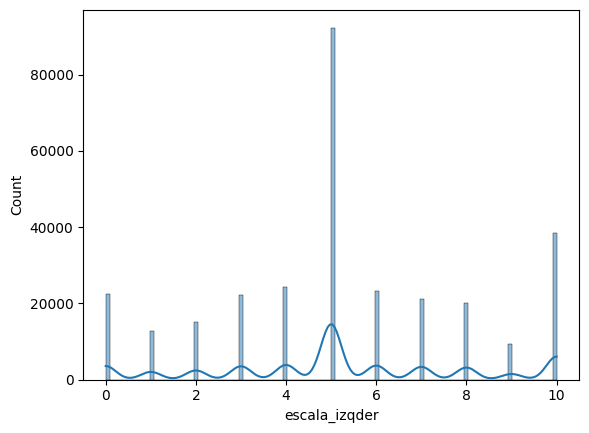

In [9]:
map_escala = {
    "5": 5,
    "6": 6,
    "4": 4,
    "2": 2,
    "8": 8,
    "3": 3,
    "9": 9,
    "7": 7,
    "Izquierda": 0,
    "Derecha": 10,
    "1": 1,
    "05": 5,
    "04": 4,
    "02": 2,
    "08": 8,
    "07": 7,
    "06": 6,
    "03": 3,
    "09": 9,
    "01": 1,
    "00 Izquierda": 0,
    "10 Derecha": 10,
    "0 Izquierda": 0,
    "Ninguno": np.nan,
    "DERECHA": 10,
    "IZQUIERDA": 0,
    "No sabe": np.nan,
    "No contesta": np.nan,
}
df["escala_izqder"] = df["escala_izqder"].map(map_escala)
sns.histplot(data=df, x='escala_izqder', kde=True)

<Axes: xlabel='percep_economia', ylabel='Count'>

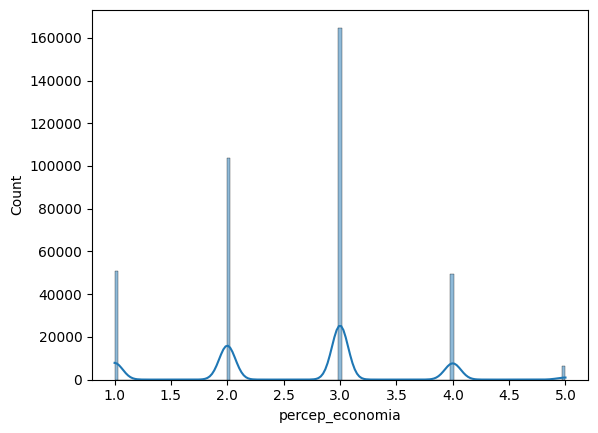

In [10]:
map_percep_economia = {
    "Regular": 3,
    "Mala": 2,
    "Muy mala": 1,
    "Buena": 4,
    "Muy buena": 5,
    "Muy Buena": 5,
    "No sabe": np.nan,
    "No contesta": np.nan,
    "Muy Mala": 1,
}
df["percep_economia"] = df["percep_economia"].map(map_percep_economia)
sns.histplot(data=df, x='percep_economia', kde=True)

In [11]:
map_conf = {
    "Poca": 2,
    "Ninguna": 1,
    "Algo": 3,
    "Mucho": 4,
    "Mucha": 4,
    "Algo de confianza": 3,
    "Poca confianza": 2,
    "Mucha confianza": 4,
    "Ninguna confianza": 1,
    "Algo confianza": 3,
    "Ninguna confinaza": 1,
    "No contesta": np.nan,
    "No sabe": np.nan,
}
df["conf_gobierno"] = df["conf_gobierno"].map(map_conf)
df["conf_gobierno"].value_counts()

conf_gobierno
2.0    123044
1.0    119363
3.0     91528
4.0     37858
Name: count, dtype: int64

In [12]:
df["conf_congreso"] = df["conf_congreso"].map(map_conf)
df["conf_congreso"].value_counts()

conf_congreso
2.0    129876
1.0    129301
3.0     80091
4.0     21317
Name: count, dtype: int64

In [13]:
df["conf_poderjud"] = df["conf_poderjud"].map(map_conf)
df["conf_poderjud"].value_counts()

conf_poderjud
2.0    132863
1.0    120300
3.0     84761
4.0     24495
Name: count, dtype: int64

In [14]:
df["conf_iglesia"] = df["conf_iglesia"].map(map_conf)
df["conf_iglesia"].value_counts()

conf_iglesia
4.0    146053
3.0    102194
2.0     73241
1.0     52293
Name: count, dtype: int64

In [15]:
df["conf_policia"] = df["conf_policia"].map(map_conf)
df["conf_policia"].value_counts()

conf_policia
2.0    126380
3.0    104833
1.0    103711
4.0     40425
Name: count, dtype: int64

In [16]:
df["conf_ffaa"] = df["conf_ffaa"].map(map_conf)
df["conf_ffaa"].value_counts()

conf_ffaa
3.0    104924
2.0    100594
1.0     75352
4.0     56810
Name: count, dtype: int64

In [17]:
df["conf_partidospol"] = df["conf_partidospol"].map(map_conf)
df["conf_partidospol"].value_counts()

conf_partidospol
1.0    173497
2.0    122979
3.0     58090
4.0     11675
Name: count, dtype: int64

In [18]:
map_sexo = {"Mujer": 1, "Hombre": 2, "Femenino": 1, "Masculino": 2}

In [19]:
df["sexo"] = df["sexo"].map(map_sexo)
df["sexo"].value_counts()

sexo
1    196327
2    183932
Name: count, dtype: int64

In [20]:
map_nse = {
    "Regular": 3,
    "Muy bueno": 5,
    "Malo": 2,
    "Bueno": 4,
    "Muy malo": 1,
    "Muy  bueno": 5,
    "Muy Bueno": 5,
    "Muy Malo": 1,
}
df["nse"] = df["nse"].map(map_nse)
df["nse"].value_counts()

nse
3.0    145327
4.0    124794
2.0     45187
5.0     31813
1.0      9605
Name: count, dtype: int64

In [21]:
df["anio"] = df["anio"].astype(int)
df["ponderador"] = pd.to_numeric(df["ponderador"], errors="coerce")

In [22]:
map_pais = {
    "Argentina": "Argentina",
    "Bolivia": "Bolivia",
    "Brasil": "Brasil",
    "Colombia": "Colombia",
    "Costa Rica": "Costa Rica",
    "Chile": "Chile",
    "Ecuador": "Ecuador",
    "El Salvador": "El Salvador",
    "Guatemala": "Guatemala",
    "Honduras": "Honduras",
    "México": "México",
    "Nicaragua": "Nicaragua",
    "Panamá": "Panamá",
    "Paraguay": "Paraguay",
    "Perú": "Perú",
    "Rep. Dominicana": "República Dominicana",
    "Uruguay": "Uruguay",
    "Venezuela": "Venezuela",
    "Brazil": "Brasil",
    "Spain": "España",
    "Mexico": "México",
    "Panama": "Panamá",
    "Peru": "Perú",
    "Dominican Rep.": "República Dominicana",
    " Argentina": "Argentina",
    " Bolivia": "Bolivia",
    " Brasil": "Brasil",
    " Colombia": "Colombia",
    " Costa Rica": "Costa Rica",
    " Chile": "Chile",
    " Rep. Dominicana": "República Dominicana",
    " Ecuador": "Ecuador",
    " El Salvador": "El Salvador",
    " Guatemala": "Guatemala",
    " Honduras": "Honduras",
    " Mexico": "México",
    " Panama": "Panamá",
    " Paraguay": "Paraguay",
    " Peru": "Perú",
    " Uruguay": "Uruguay",
    " Venezuela": "Venezuela",
    "República Dominicana": "República Dominicana",
    " México": "México",
    " Nicaragua": "Nicaragua",
    " Panamá": "Panamá",
    " Perú": "Perú"
}
df["pais"] = df["pais"].map(map_pais)
df["pais"].value_counts()

pais
España                  22327
Bolivia                 21643
Perú                    21624
México                  21610
Argentina               21610
Venezuela               21601
Ecuador                 21600
Colombia                21600
Uruguay                 21600
Chile                   21596
Brasil                  21506
Paraguay                19800
El Salvador             18052
Panamá                  18038
Costa Rica              18010
Honduras                18010
Guatemala               18006
Nicaragua               16026
República Dominicana    16000
Name: count, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380259 entries, 0 to 380258
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   apoya_democ            348966 non-null  float64
 1   satisfaccion_democ     360677 non-null  float64
 2   escala_izqder          301544 non-null  float64
 3   aprobacion_presidente  336243 non-null  float64
 4   percep_economia        375004 non-null  float64
 5   conf_congreso          360585 non-null  float64
 6   conf_gobierno          371793 non-null  float64
 7   conf_poderjud          362419 non-null  float64
 8   conf_iglesia           373781 non-null  float64
 9   conf_policia           375349 non-null  float64
 10  conf_ffaa              337680 non-null  float64
 11  conf_partidospol       366241 non-null  float64
 12  sexo                   380259 non-null  int64  
 13  edad                   380252 non-null  float64
 14  nse                    356726 non-nu

In [24]:
df.head()

,apoya_democ,satisfaccion_democ,escala_izqder,aprobacion_presidente,percep_economia,conf_congreso,conf_gobierno,conf_poderjud,conf_iglesia,conf_policia,conf_ffaa,conf_partidospol,sexo,edad,nse,pais,anio,ponderador
0,2.0,2.0,0.0,0.0,2.0,3.0,3.0,3.0,NaN,3.0,3.0,2.0,1,61.0,3.0,Argentina,2017,1.583
1,3.0,2.0,5.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2,39.0,3.0,Argentina,2017,0.710
2,3.0,4.0,8.0,1.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,1,38.0,5.0,Argentina,2017,0.999
3,3.0,2.0,NaN,1.0,2.0,2.0,4.0,1.0,4.0,2.0,4.0,1.0,1,48.0,2.0,Argentina,2017,0.710
4,3.0,3.0,8.0,1.0,4.0,2.0,4.0,4.0,4.0,2.0,4.0,1.0,2,67.0,4.0,Argentina,2017,0.710


In [25]:
df.to_csv("../datasets/serie_latinobarometro_2002-2024.csv", index=False, sep=",", encoding="utf-8")